<a href="https://colab.research.google.com/github/knhuvuong/Nhom05_projectML_2024/blob/main/Nhom5_projectML_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Mounted at /content/gdrive
/content/gdrive/MyDrive


# **Tiền xử lý tập dữ liệu**

In [3]:
import pandas as pd
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Chọn các cột categorical cần mã hóa
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Áp dụng one-hot encoding và đổi tên cột
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix='one-hot')

# Chọn các cột numeric cần chuẩn hóa và đổi tên cột
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
df_encoded.rename(columns={col: col + '_scaler' for col in numeric_cols}, inplace=True)

df_encoded

,Age_scaler,Height_scaler,Weight_scaler,FCVC_scaler,NCP_scaler,CH2O_scaler,FAF_scaler,TUE_scaler,NObeyesdad,one-hot_Female,...,one-hot_yes,one-hot_Always,one-hot_Frequently,one-hot_Sometimes,one-hot_no,one-hot_Automobile,one-hot_Bike,one-hot_Motorbike,one-hot_Public_Transportation,one-hot_Walking
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,Normal_Weight,True,...,False,False,False,False,True,False,False,False,True,False
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,Normal_Weight,True,...,True,False,False,True,False,False,False,False,True,False
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,Normal_Weight,False,...,False,False,True,False,False,False,False,False,True,False
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,Overweight_Level_I,False,...,False,False,True,False,False,False,False,False,False,True
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,Overweight_Level_II,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,Obesity_Type_III,True,...,False,False,False,True,False,False,False,False,True,False
2107,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,Obesity_Type_III,True,...,False,False,False,True,False,False,False,False,True,False
2108,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,Obesity_Type_III,True,...,False,False,False,True,False,False,False,False,True,False
2109,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,Obesity_Type_III,True,...,False,False,False,True,False,False,False,False,True,False


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Tạo mô hình Random Forest
rf = RandomForestClassifier()

# Huấn luyện mô hình trên dữ liệu đã xử lý
rf.fit(df_encoded.drop('NObeyesdad', axis=1), df_encoded['NObeyesdad'])

# Lựa chọn đặc trưng
sfm = SelectFromModel(rf, prefit=True)
selected_features = df_encoded.drop('NObeyesdad', axis=1).columns[sfm.get_support()]

# In ra các đặc trưng được chọn
print(selected_features)

Index(['Age_scaler', 'Height_scaler', 'Weight_scaler', 'FCVC_scaler',
       'NCP_scaler', 'CH2O_scaler', 'FAF_scaler', 'TUE_scaler',
       'one-hot_Female', 'one-hot_Male'],
      dtype='object')


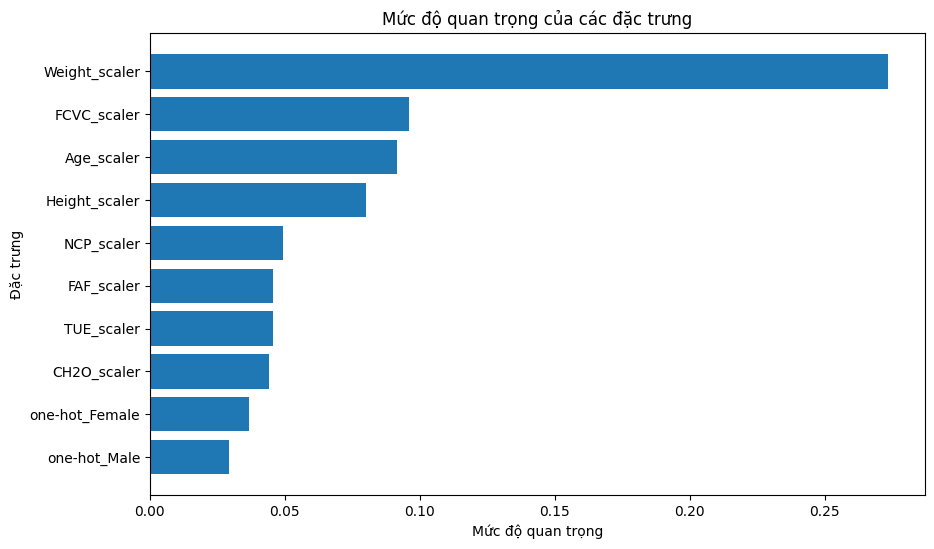

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf.feature_importances_

# Tạo DataFrame từ feature importances
feature_importances = pd.DataFrame({'feature': selected_features, 'importance': importances[sfm.get_support()]})

# Sắp xếp DataFrame theo mức độ quan trọng
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Đảo ngược thứ tự để vẽ từ cao đến thấp
feature_importances = feature_importances[::-1]

# Vẽ biểu đồ bar
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Mức độ quan trọng')
plt.ylabel('Đặc trưng')
plt.title('Mức độ quan trọng của các đặc trưng')
plt.show()

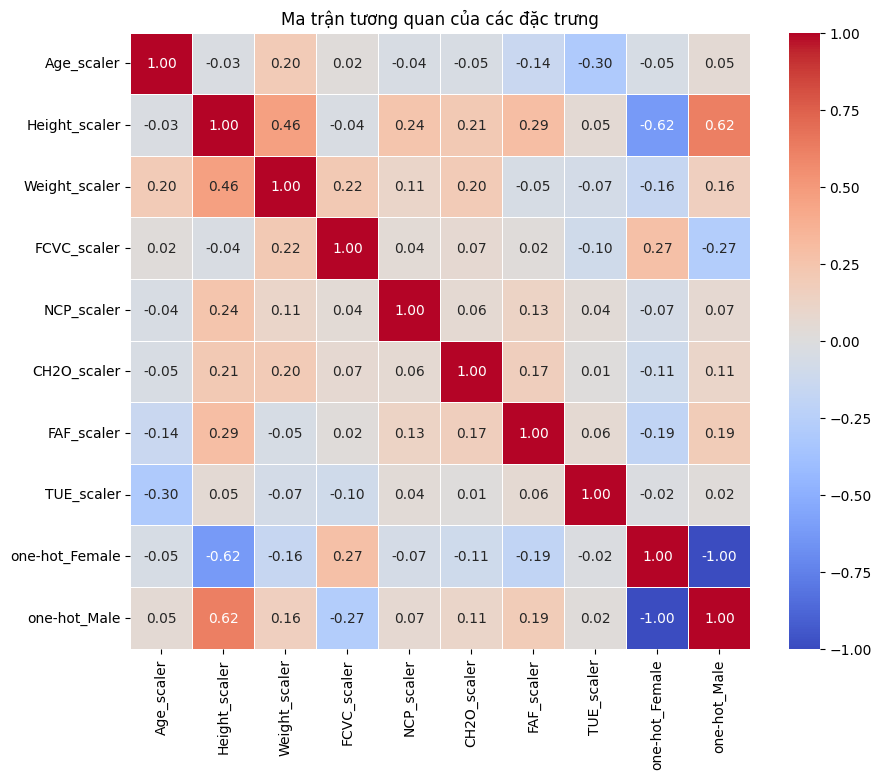

In [38]:
import seaborn as sns

# Tính toán ma trận tương quan
correlation_matrix = df_encoded[selected_features].corr()

# Vẽ ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận tương quan của các đặc trưng')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded.drop('NObeyesdad', axis=1), df_encoded['NObeyesdad'], test_size=0.2, random_state=42
)

print("Kích thước tập huấn luyện:", X_train.shape, y_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape, y_test.shape)

Kích thước tập huấn luyện: (1688, 31) (1688,)
Kích thước tập kiểm tra: (423, 31) (423,)


In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Khởi tạo mô hình Neural Networks
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
nn.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_nn = nn.predict(X_test)

# Đánh giá mô hình
print("Kết quả Neural Networks:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
rf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf.predict(X_test)

# Đánh giá mô hình
print("\nKết quả Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Kết quả Neural Networks:
Accuracy: 0.9290780141843972
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      1.00      0.94        56
      Normal_Weight       0.92      0.76      0.83        62
     Obesity_Type_I       0.97      0.96      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.82      0.91      0.86        56
Overweight_Level_II       0.92      0.88      0.90        50

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423


Kết quả Random Forest:
Accuracy: 0.9314420803782506
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        56
      Normal_Weight       0.82      0.87      0.84        62
     Obesity_Type_I       0.99     

In [25]:
# prompt: print ra điểm trung bình của các giá trị acc, pre, re, f1 cho 2 thuật toán trên đi

from sklearn.metrics import precision_recall_fscore_support

# Đánh giá mô hình Neural Networks
nn_precision, nn_recall, nn_f1, _ = precision_recall_fscore_support(y_test, y_pred_nn, average='weighted')
nn_accuracy = accuracy_score(y_test, y_pred_nn)

# Đánh giá mô hình Random Forest
rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# In ra điểm trung bình
print("\nĐiểm trung bình của NR:")
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", nn_recall)
print("F1-score:", nn_f1)

print("\nĐiểm trung bình của RF:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)


Điểm trung bình của NR:
Accuracy: 0.9290780141843972
Precision: 0.931018454896489
Recall: 0.9290780141843972
F1-score: 0.9280910967308088

Điểm trung bình của RF:
Accuracy: 0.9314420803782506
Precision: 0.9332299505238136
Recall: 0.9314420803782506
F1-score: 0.9319148320996857
